# Case 1 - Binary Class Classification Model

In [1]:
# Titanic dataset
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
dataset = dataset.drop(['PassengerId', 'Name','Ticket','Fare','Cabin'], axis=1)

In [5]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
dataset.isnull().sum()/len(dataset)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64

In [7]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
dataset['Age'].mean()

29.69911764705882

In [9]:
dataset['Age'].median()

28.0

<AxesSubplot:ylabel='Age'>

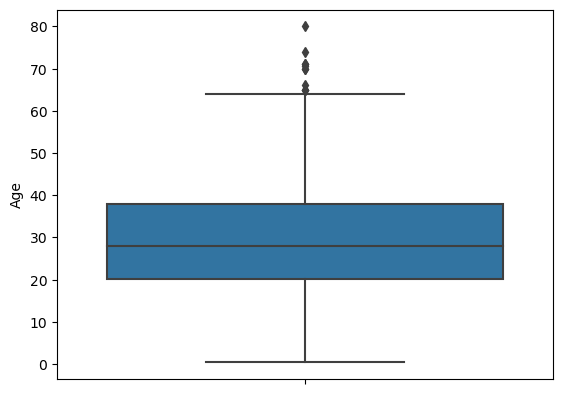

In [10]:
sns.boxplot(y='Age', data=dataset)

In [11]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [12]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [14]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

# Encoding concept

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [16]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# label encoder
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'] = dataset['Sex'].cat.codes

In [18]:
dataset = pd.get_dummies(dataset, columns=['Embarked'])

In [19]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [20]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
dataset = pd.get_dummies(dataset, columns=['Pclass'])

In [22]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,0,1,1,0,0
4,0,1,35.0,0,0,0,0,1,0,0,1


In [23]:
# dummy variable
dataset = dataset.drop(['Embarked_C', 'Pclass_1'], axis=1)

In [24]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [25]:
# outlier not required in this case

In [26]:
# Mandatory in classification problem - Imbalance check 
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
549/(549+342)

0.6161616161616161

In [28]:
# split the data into dep and ind variable
x = dataset.iloc[:,1:]
y = dataset[['Survived']]

In [29]:
x.head()

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,1,0,0
4,1,35.0,0,0,0,1,0,1


In [30]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [31]:
# split the data into train and test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, 
                                                    random_state=101,stratify=y)

# Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit = LogisticRegression(multi_class='multinomial')
logit.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

# Predict the data

In [34]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

# Evaluate the model

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
print("Trainging Accuracy Score :", accuracy_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test))

Trainging Accuracy Score : 0.8173652694610778
****************************************************************************************************************************************************************
Test Accuracy Score : 0.7488789237668162


In [37]:
print( classification_report(y_train, y_pred_train))
print("****************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       412
           1       0.78      0.73      0.75       256

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.82      0.82      0.82       668

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       137
           1       0.73      0.56      0.63        86

    accuracy                           0.75       223
   macro avg       0.74      0.71      0.72       223
weighted avg       0.75      0.75      0.74       223



In [38]:
print( confusion_matrix(y_train, y_pred_train))
print("****************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[359  53]
 [ 69 187]]
****************************************************************************************************************************************************************
[[119  18]
 [ 38  48]]


In [39]:
y_pred_test

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [40]:
y_test

,Survived
374,0
413,0
83,0
85,1
345,1
...,...
740,1
175,0
689,1
151,1


# ROC AND AUC

In [41]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.7133763367849261

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.13138686, 1.        ])

array([0.        , 0.55813953, 1.        ])

array([2, 1, 0], dtype=int64)

In [43]:
tpr

array([0.        , 0.55813953, 1.        ])

In [44]:
thresholds

array([2, 1, 0], dtype=int64)

# Plotting ROC and AUC curve

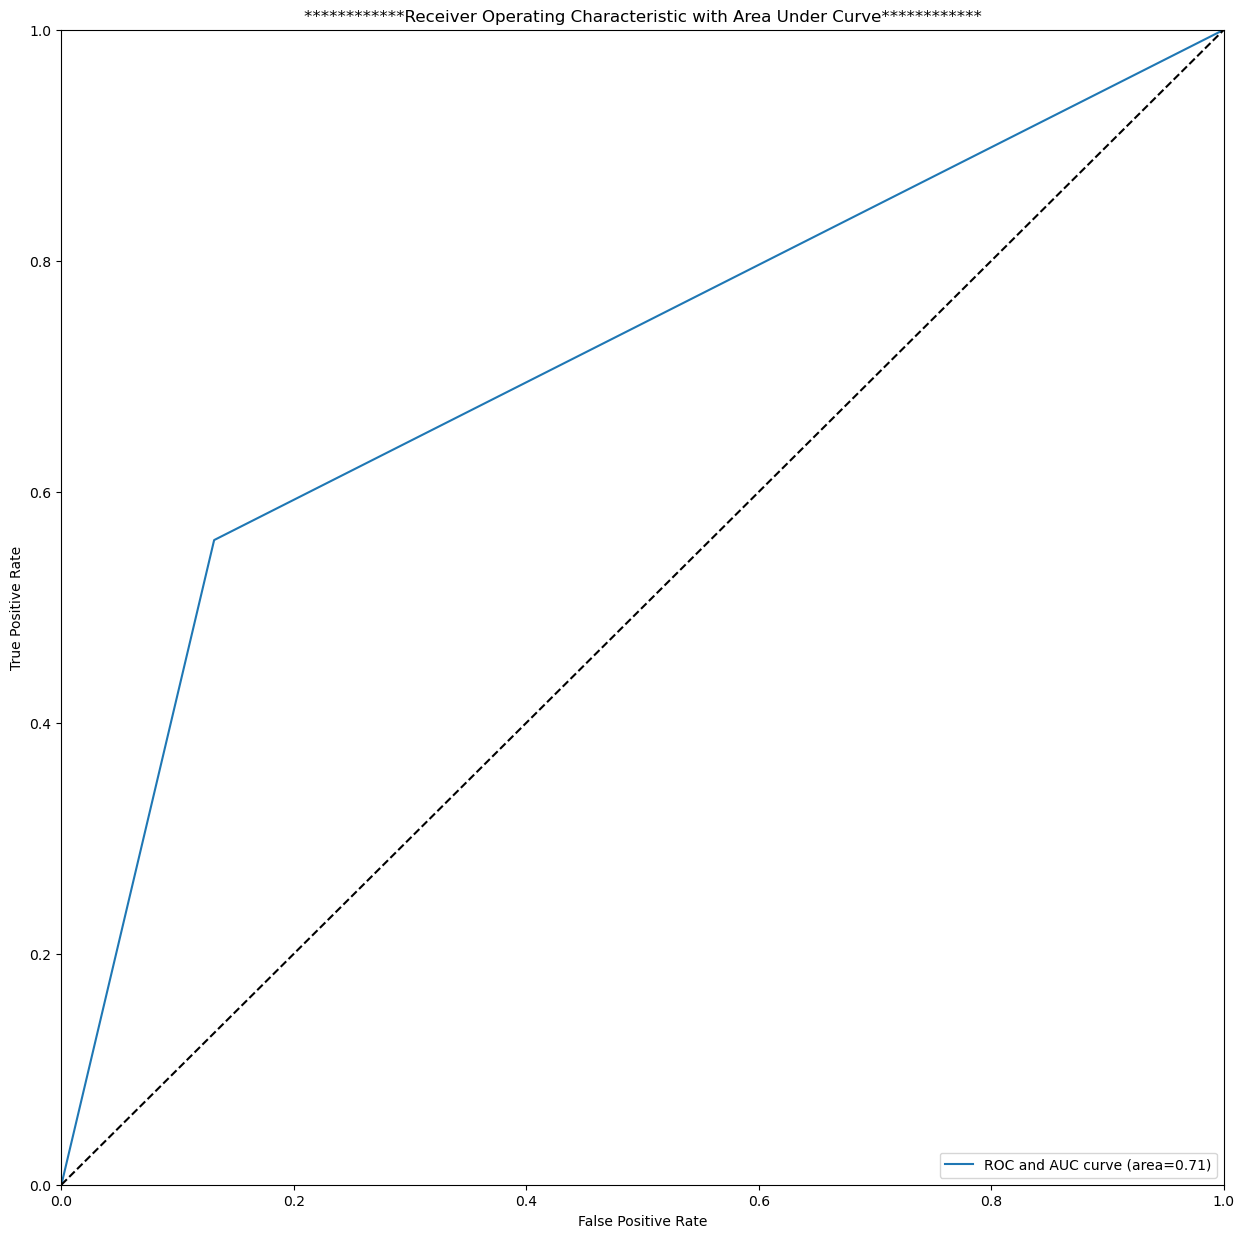

In [45]:
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("************Receiver Operating Characteristic with Area Under Curve************")
plt.legend(loc='lower right')
plt.show()

In [46]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=10)
print(training_accuracy)
print()
print(test_accuracy)
print()
print("Training Avg Accuracy", training_accuracy.mean())
print()
print("Test Avg Accuracy", test_accuracy.mean())

[0.85074627 0.73134328 0.80597015 0.85074627 0.80597015 0.88059701
 0.74626866 0.82089552 0.75757576 0.8030303 ]

[0.73913043 0.65217391 0.73913043 0.86363636 0.86363636 0.68181818
 0.81818182 0.81818182 0.86363636 0.77272727]

Training Avg Accuracy 0.8053143374038896

Test Avg Accuracy 0.7812252964426876


In [47]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=20)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=20)
print(training_accuracy)
print()
print(test_accuracy)

[0.79411765 0.91176471 0.73529412 0.79411765 0.79411765 0.82352941
 0.82352941 0.85294118 0.78787879 0.78787879 0.87878788 0.84848485
 0.81818182 0.6969697  0.84848485 0.75757576 0.78787879 0.78787879
 0.90909091 0.72727273]

[0.66666667 0.58333333 0.66666667 0.72727273 0.72727273 0.72727273
 0.90909091 0.81818182 0.90909091 0.81818182 0.81818182 0.54545455
 1.         0.72727273 0.90909091 0.81818182 0.90909091 0.81818182
 0.72727273 0.81818182]


In [48]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=20)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=20)
print("Training Accuracy", training_accuracy[1])
print()
print("Test Accuracy", test_accuracy[6])

Training Accuracy 0.9117647058823529

Test Accuracy 0.9090909090909091


# Case 2 - MultiClassClassification Problem (One Vs Rest(OVR) / One vs All(OVA))

In [49]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [54]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:
# split the data into indep and dep variable

x = df.iloc[:,0:-1]
y = df[['species']]

In [56]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [58]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Building Logistic Regression - MultiClass Classification 

In [59]:
# OVR/OVA
from sklearn.linear_model import LogisticRegression
logit_ovr = LogisticRegression(multi_class='ovr')
logit_ovr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [60]:
# predict
y_pred_train = logit_ovr.predict(x_train)
y_pred_test = logit_ovr.predict(x_test)

In [61]:
print("Trainging Accuracy Score :", accuracy_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test))

Trainging Accuracy Score : 0.9553571428571429
****************************************************************************************************************************************************************
Test Accuracy Score : 0.8947368421052632


In [62]:
print( classification_report(y_train, y_pred_train))
print("****************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.88      0.92        34
           2       0.91      0.98      0.94        41

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86        16
           2       0.69      1.00      0.82         9

    accuracy                           0.89        38
   macro avg       0.90      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



In [63]:
print( confusion_matrix(y_train, y_pred_train))
print("****************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[37  0  0]
 [ 0 30  4]
 [ 0  1 40]]
****************************************************************************************************************************************************************
[[13  0  0]
 [ 0 12  4]
 [ 0  0  9]]


In [64]:
#!pip install mlxtend --upgrade

In [65]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [66]:
"""
import mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, logit_ovr, legend=2 )
plt.xlabel("Sepal length")
plt.ylabel('petal length')
plt.title("Logistic Regression with OVR/OVA model")
plt.show()
"""

'\nimport mlxtend\nfrom mlxtend.plotting import plot_decision_regions\n\nplot_decision_regions(x.values, y.values, logit_ovr, legend=2 )\nplt.xlabel("Sepal length")\nplt.ylabel(\'petal length\')\nplt.title("Logistic Regression with OVR/OVA model")\nplt.show()\n'

# multinomial/Softmax

In [67]:
logit_multi = LogisticRegression(multi_class='multinomial')
logit_multi.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [68]:
y_pred_train_m = logit_multi.predict(x_train)
y_pred_test_m = logit_multi.predict(x_test)

In [69]:
print("Trainging Accuracy Score :", accuracy_score(y_train, y_pred_train_m))
print("****************"*10)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_m))

Trainging Accuracy Score : 0.9821428571428571
****************************************************************************************************************************************************************
Test Accuracy Score : 0.9736842105263158


In [70]:
print( classification_report(y_train, y_pred_train_m))
print("****************"*10)
print(classification_report(y_test, y_pred_test_m))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.94      0.97        34
           2       0.95      1.00      0.98        41

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [73]:
confusion_matrix(y_train, y_pred_train_m)
print("****************"*10)
confusion_matrix(y_test, y_pred_test_m)

array([[37,  0,  0],
       [ 0, 32,  2],
       [ 0,  0, 41]], dtype=int64)

In [74]:
confusion_matrix(y_test, y_pred_test_m)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)